In [95]:
import auxiliary, coordinates, constants, models
from maneuvers import Maneuvers
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import datetime
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
def getSatHistoricalData(TleHistoricalFile):
    satCoes = []
    satDates = []
    satAltitudes = []
    satBallistic = []
    with open(TleHistoricalFile,"r") as f:
        while True:
            line1 = f.readline()
            line2 = f.readline()
            if line1 == "":
                break
            i = float(line2[8:16])*np.pi/180
            Omega = float(line2[17:25])*np.pi/180
            e = float("0."+line2[26:33])
            omega = float(line2[34:42])*np.pi/180
            M = float(line2[43:51])*np.pi/180

            for E in range(0,3600):
                E = E/10*np.pi/180
                if(abs(E-e*np.sin(E)-M) < 0.01):
                    break;
  
            nu = 2*np.arctan2((1+e)**0.5*np.sin(E/2),(1-e)**0.5*np.cos(E/2))

            n = float(line2[52:63])*2*np.pi/(60*60*24)
            a = (constants.mu_E/n**2)**(1/3)

            if int(line1[18:20]) < 60:
                year = int("20"+line1[18:20])
            else:
                year = int("19"+line1[18:20]) 

            coe = [a,e,i,omega,Omega,nu]
            date = datetime.datetime(year,1,1)+datetime.timedelta(days=float(line1[20:32]))
          
            # BSTAR has units of (earth radii)**-1
            # Air density reference: 0.1570 kg/m^2/Earth radii
            BSTAR = float(line1[53]+"0."+line1[54:59])*10**float(line1[59:61])
            B = BSTAR*2/0.1570

            satCoes.append(coe)
            satDates.append(date)
            satBallistic.append(B)
            r,v = coordinates.kep2cart(coe)
            altitude = np.linalg.norm(r)/1e3-constants.Re/1e3
            satAltitudes.append(altitude)
    satCoes = np.array(satCoes).reshape((-1,6))
    return satDates, satCoes, satAltitudes, satBallistic

# Tiangong-1

In [8]:
tiangongCoes = []
tiangongDates = []
tiangongAltitudes = []
tiangongBallistic = []
l1 = None
l2 = None
with open("Tiangong-1_Historic_TLEs.txt","r") as f:
    while True:
        l1 = f.readline()
        l2 = f.readline()
        if l1 == "":
            break
        with open("Tiangong-1_Partial_TLE.tle","w") as f2:
            f2.write("TIANGONG-1\n")
            f2.write(l1)
            f2.write(l2)
        coe,date,B = auxiliary.parseTle("Tiangong-1_Partial_TLE.tle",getB=True)
        tiangongCoes.append(coe)
        tiangongDates.append(date)
        tiangongBallistic.append(B)
        r,v = coordinates.kep2cart(coe)
        altitude = np.linalg.norm(r)/1e3-constants.Re/1e3
        tiangongAltitudes.append(altitude)
os.remove("Tiangong-1_Partial_TLE.tle")
tiangongCoes = np.array(tiangongCoes).reshape((-1,6))

In [9]:
i = 10
coe = tiangongCoes[i,:]
date = tiangongDates[0]
tiangongMass = 8506
tiangongArea = tiangongBallistic[i]*tiangongMass/2.2
print("Radial Area: ",np.pi*(3.35/2)**2)
print("TLE Area: ",tiangongArea)
tiangongModel = models.Spacecraft(tiangongMass,tiangongMass,tiangongArea)

tiangongManeuvers = Maneuvers(coe,tiangongModel,date,verbose=True)
tiangongManeuvers.addPerturbation("atmosphere")
tiangongManeuvers.propagate(60*60*24*365*1.52,60*10)

Radial Area:  8.814130888727863
TLE Area:  11.888206253618991
Propagating...from day  0.0  to  554.8000000000001
Day:0.0	Height: 369.96273420289157 km	Mass: 0.0
Day:8.454829902587505e-07	Height: 369.9635919033112 km	Mass: 0.0
Day:8.454829902587505e-07	Height: 369.9635919030923 km	Mass: 0.0
Day:1.690965980517501e-06	Height: 369.96444958587455 km	Mass: 0.0
Day:1.690965980517501e-06	Height: 369.9644495856548 km	Mass: 0.0
Day:0.0009414431673138468	Height: 370.9055048385644 km	Mass: 0.0
Day:0.0009414431673138468	Height: 370.9055063779587 km	Mass: 0.0
Day:4.000839370271177	Height: 356.910878589754 km	Mass: 0.0
Day:4.000839370271177	Height: 356.91084739325197 km	Mass: 0.0
Day:10.001115648120004	Height: 356.53372945345285 km	Mass: 0.0
Day:10.001115648120004	Height: 356.53397802013063 km	Mass: 0.0
Day:17.00044770960903	Height: 374.0529259262914 km	Mass: 0.0
Day:17.00044770960903	Height: 374.0527430468602 km	Mass: 0.0
Day:24.00061962997427	Height: 368.1960173440892 km	Mass: 0.0
Day:24.0006196299

Day:446.00096805909993	Height: 293.70087823129444 km	Mass: 0.0
Day:446.00096805909993	Height: 293.7037429034626 km	Mass: 0.0
Day:461.0001050155567	Height: 286.90143536173923 km	Mass: 0.0
Day:461.0001050155567	Height: 286.9028755354797 km	Mass: 0.0
Day:475.00105360258004	Height: 285.72270251164866 km	Mass: 0.0
Day:475.00105360258004	Height: 285.7236192776319 km	Mass: 0.0
Day:479.0009552236515	Height: 284.0815027975654 km	Mass: 0.0
Day:479.0009552236515	Height: 284.0821509356778 km	Mass: 0.0
Day:481.0005740461663	Height: 282.35323438204455 km	Mass: 0.0
Day:481.0005740461663	Height: 282.3543821923258 km	Mass: 0.0
Day:485.0003740724865	Height: 278.4965014595259 km	Mass: 0.0
Day:485.0003740724865	Height: 278.49800878657214 km	Mass: 0.0
Day:486.00056057787	Height: 277.65049294037 km	Mass: 0.0
Day:486.00056057787	Height: 277.6519808715116 km	Mass: 0.0
Day:489.0006743512618	Height: 275.17232779046986 km	Mass: 0.0
Day:489.0006743512618	Height: 275.17317594347895 km	Mass: 0.0
Day:490.00085183734

------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Date/Time:
  Initial Date: 2016-09-20 03:38:46

Spacecraft:
  Wet Mass: 		8506 kg
  Dry Mass: 		8506 kg
  Propellant Mass: 	0 kg
  Drag Area: 		11.888206253618991 m2
  Cd: 			2.2
  Cr: 			2

Thruster:
  Name/Model:		Generic Thruster
  Thrust (nominal):	0.1 N
  Isp (nominal):	720 s
  Power (nominal):	1 W

Solar Panels:
  Name/Model:			Generic Solar Panel
  Number of Panels:		1 N
  Individual Area:		0.03 s
  Total Power (nominal):	42.0 W

Orbit:
  Semi-major axis (a): 		6745.429829558797 km
  Eccentricity (e): 		0.001574
  Inclination (i): 		42.7662 deg
  Argument of Perigee (omega): 	351.0529 deg
  RAAN (Omega): 		24.7762 deg
  True Anomaly (nu): 		103.88758 deg

----FINAL CONDITIONS----
Date/Time:
  Elapsed Time:	554 days, 19:12:00
  End Date:	2018-03-28 22:50:46

Spacecraft:
  Propellant Mass: 	0.0 kg

Orbit:
  Semi-major axis (a): 		6559.480661116893 km
  Eccentricity (e): 		0.000181
  Inclination (i): 		42.748423143

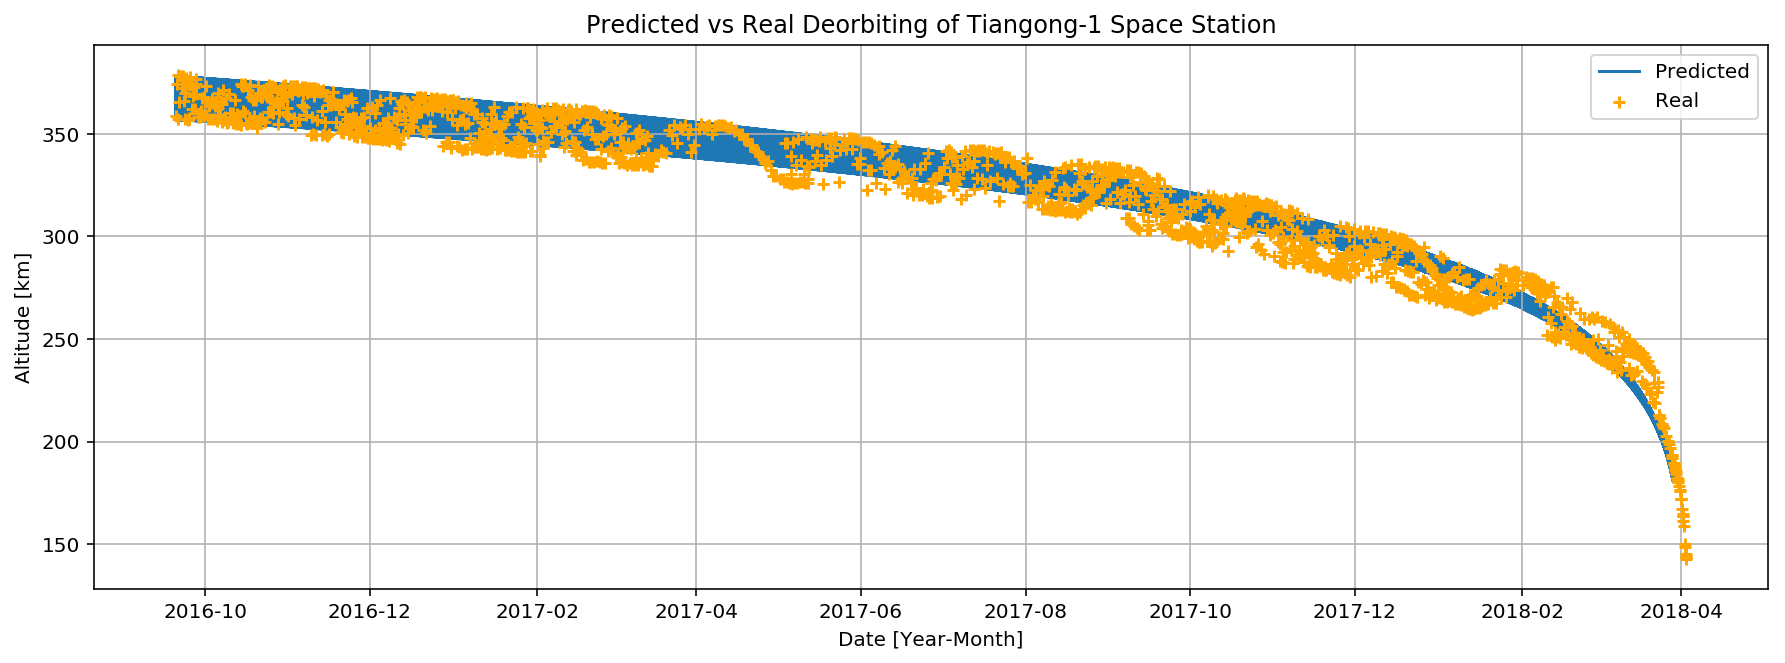

In [12]:
tiangongManeuvers.makeReport()
plt.figure(figsize=(15,5));
plt.title("Predicted vs Real Deorbiting of Tiangong-1 Space Station")
plt.xlabel("Date [Year-Month]")
plt.ylabel("Altitude [km]")
plt.plot(tiangongManeuvers.history.datetime,np.linalg.norm(tiangongManeuvers.history.r,axis=1)/1e3-constants.Re/1e3,zorder=1,label="Predicted")
plt.scatter(tiangongDates,tiangongAltitudes,marker="+",color="orange",zorder=2,label="Real");
plt.legend()
plt.grid()

# SUCHAI

In [101]:
suchaiCoes = []
suchaiDates = []
suchaiAltitudes = []
suchaiBallistic = []
l1 = None
l2 = None
with open("SUCHAI_Historic_TLEs.txt","r") as f:
    while True:
        l1 = f.readline()
        l2 = f.readline()
        if l1 == "":
            break
        with open("SUCHAI_Partial_TLE.tle","w") as f2:
            f2.write(l1)
            f2.write(l2)
        coe,date,B = auxiliary.parseTle("SUCHAI_Partial_TLE.tle",getB=True)
        suchaiCoes.append(coe)
        suchaiDates.append(date)
        suchaiBallistic.append(B)
        r,v = coordinates.kep2cart(coe)
        altitude = np.linalg.norm(r)/1e3-constants.Re/1e3
        suchaiAltitudes.append(altitude)
os.remove("SUCHAI_Partial_TLE.tle")
suchaiCoes = np.array(suchaiCoes).reshape((-1,6))

IndexError: list index out of range

In [40]:
i = 0
coe = suchaiCoes[i,:]
date = suchaiDates[0]
suchaiMass = 1
suchaiArea = suchaiBallistic[i]*suchaiMass/2.2
print("TLE Area: ",suchaiArea)
suchaiModel = models.Spacecraft(suchaiMass,suchaiMass,suchaiArea)

suchaiManeuvers = Maneuvers(coe,suchaiModel,date,verbose=True)
suchaiManeuvers.addPerturbation("atmosphere")
suchaiManeuvers.propagate(60*60*24*365*17.2,60*10)

TLE Area:  0.0005790387955993052
Propagating...from day  0.0  to  6278.0
Day:0.0	Height: 504.430649130065 km	Mass: 0.0
Day:8.462787487741391e-07	Height: 504.43119649499187 km	Mass: 0.0
Day:8.462787487741391e-07	Height: 504.4311964949053 km	Mass: 0.0
Day:1.6925574975482783e-06	Height: 504.4317438428942 km	Mass: 0.0
Day:1.6925574975482783e-06	Height: 504.4317438428048 km	Mass: 0.0
Day:0.0010389707535400103	Height: 505.08880037761105 km	Mass: 0.0
Day:0.0010389707535400103	Height: 505.0888016472813 km	Mass: 0.0
Day:7.000485782117523	Height: 501.3835302052088 km	Mass: 0.0
Day:7.000485782117523	Height: 501.382351793848 km	Mass: 0.0
Day:9.000558402570658	Height: 498.34824251632483 km	Mass: 0.0
Day:9.000558402570658	Height: 498.3476413434865 km	Mass: 0.0
Day:20.000298693089913	Height: 508.35643397036756 km	Mass: 0.0
Day:20.000298693089913	Height: 508.3569567493638 km	Mass: 0.0
Day:23.000499141729197	Height: 494.92830118954646 km	Mass: 0.0
Day:23.000499141729197	Height: 494.92775694158394 km	Ma

Day:626.0006965030364	Height: 492.4155381918419 km	Mass: 0.0
Day:626.0006965030364	Height: 492.3866521104509 km	Mass: 0.0
Day:641.0007179682979	Height: 496.43085022884515 km	Mass: 0.0
Day:641.0007179682979	Height: 496.4058225698341 km	Mass: 0.0
Day:689.0005838396387	Height: 487.92812424575726 km	Mass: 0.0
Day:689.0005838396387	Height: 487.9079398448765 km	Mass: 0.0
Day:712.0005383031321	Height: 495.0149180376567 km	Mass: 0.0
Day:712.0005383031321	Height: 494.9796186914593 km	Mass: 0.0
Day:784.0002601169791	Height: 496.4142253447706 km	Mass: 0.0
Day:784.0002601169791	Height: 496.38713467555027 km	Mass: 0.0
Day:786.0005281536254	Height: 488.319829679342 km	Mass: 0.0
Day:786.0005281536254	Height: 488.2894409129666 km	Mass: 0.0
Day:788.0007961902716	Height: 495.0481406774716 km	Mass: 0.0
Day:788.0007961902716	Height: 495.0152099070102 km	Mass: 0.0
Day:790.001064226918	Height: 489.6667007606132 km	Mass: 0.0
Day:790.001064226918	Height: 489.63215388522207 km	Mass: 0.0
Day:859.0000008312295	H

Day:1789.0009099519277	Height: 472.1598777154917 km	Mass: 0.0
Day:1789.0009099519277	Height: 472.14681957191044 km	Mass: 0.0
Day:1860.0001145928854	Height: 481.95067438398024 km	Mass: 0.0
Day:1860.0001145928854	Height: 481.9419343534345 km	Mass: 0.0
Day:1862.0003826295322	Height: 470.17434327033163 km	Mass: 0.0
Day:1862.0003826295322	Height: 470.1756349702822 km	Mass: 0.0
Day:1864.0006506661782	Height: 481.04308635353857 km	Mass: 0.0
Day:1864.0006506661782	Height: 481.03821570244804 km	Mass: 0.0
Day:1866.0009187028243	Height: 474.1261327460781 km	Mass: 0.0
Day:1866.0009187028243	Height: 474.10550601909773 km	Mass: 0.0
Day:1937.0001233437824	Height: 468.9685298544746 km	Mass: 0.0
Day:1937.0001233437824	Height: 468.9694185626581 km	Mass: 0.0
Day:1939.0003913804285	Height: 479.82059261481555 km	Mass: 0.0
Day:1939.0003913804285	Height: 479.8160560216112 km	Mass: 0.0
Day:1941.0006594170748	Height: 473.16242878233174 km	Mass: 0.0
Day:1941.0006594170748	Height: 473.1410549089387 km	Mass: 0.0


Day:3028.0003357026176	Height: 456.68090384740566 km	Mass: 0.0
Day:3028.0003357026176	Height: 456.66635928306357 km	Mass: 0.0
Day:3053.0006276430154	Height: 452.5369533889396 km	Mass: 0.0
Day:3053.0006276430154	Height: 452.51916903413365 km	Mass: 0.0
Day:3078.0009195834123	Height: 448.62421096380984 km	Mass: 0.0
Day:3078.0009195834123	Height: 448.62193883919156 km	Mass: 0.0
Day:3085.0002425925227	Height: 458.83845338220897 km	Mass: 0.0
Day:3085.0002425925227	Height: 458.8388800915461 km	Mass: 0.0
Day:3110.0005345329196	Height: 453.66070593429913 km	Mass: 0.0
Day:3110.0005345329196	Height: 453.6435126122935 km	Mass: 0.0
Day:3135.000826473317	Height: 447.26622874483934 km	Mass: 0.0
Day:3135.000826473317	Height: 447.2660417787358 km	Mass: 0.0
Day:3142.0001494824264	Height: 456.9469985381747 km	Mass: 0.0
Day:3142.0001494824264	Height: 456.944947848442 km	Mass: 0.0
Day:3160.0011184137143	Height: 453.4665591170965 km	Mass: 0.0
Day:3160.0011184137143	Height: 453.44902482707425 km	Mass: 0.0
Da

Day:4543.000922376455	Height: 409.7037283725627 km	Mass: 0.0
Day:4543.000922376455	Height: 409.7023248297004 km	Mass: 0.0
Day:4559.000222190987	Height: 410.3170790567212 km	Mass: 0.0
Day:4559.000222190987	Height: 410.31260876292924 km	Mass: 0.0
Day:4570.000720202546	Height: 412.752854400903 km	Mass: 0.0
Day:4570.000720202546	Height: 412.74607322859856 km	Mass: 0.0
Day:4586.000020017079	Height: 409.14662146408017 km	Mass: 0.0
Day:4586.000020017079	Height: 409.1428520231266 km	Mass: 0.0
Day:4597.000518028638	Height: 415.2294444183502 km	Mass: 0.0
Day:4597.000518028638	Height: 415.22936397233605 km	Mass: 0.0
Day:4608.001016040197	Height: 408.1120645429511 km	Mass: 0.0
Day:4608.001016040197	Height: 408.1085959906131 km	Mass: 0.0
Day:4624.000315854731	Height: 412.24953334748466 km	Mass: 0.0
Day:4624.000315854731	Height: 412.24470547050146 km	Mass: 0.0
Day:4635.00081386629	Height: 405.95852296302934 km	Mass: 0.0
Day:4635.00081386629	Height: 405.9584787689149 km	Mass: 0.0
Day:4649.00097143495

Day:5406.000433979646	Height: 369.63256537239624 km	Mass: 0.0
Day:5406.000433979646	Height: 369.63100616985184 km	Mass: 0.0
Day:5461.001137833321	Height: 365.9798579558441 km	Mass: 0.0
Day:5461.001137833321	Height: 365.97855549367426 km	Mass: 0.0
Day:5466.001084756942	Height: 370.24058236143736 km	Mass: 0.0
Day:5466.001084756942	Height: 370.24036776334236 km	Mass: 0.0
Day:5471.001031680561	Height: 367.31082463693434 km	Mass: 0.0
Day:5471.001031680561	Height: 367.30912415290254 km	Mass: 0.0
Day:5476.000978604182	Height: 364.317711304144 km	Mass: 0.0
Day:5476.000978604182	Height: 364.31704004615915 km	Mass: 0.0
Day:5481.000925527802	Height: 368.7696139491433 km	Mass: 0.0
Day:5481.000925527802	Height: 368.7691334019629 km	Mass: 0.0
Day:5486.000872451422	Height: 366.6745806088066 km	Mass: 0.0
Day:5486.000872451422	Height: 366.6728367067138 km	Mass: 0.0
Day:5491.000819375043	Height: 363.2293221662613 km	Mass: 0.0
Day:5491.000819375043	Height: 363.228709061035 km	Mass: 0.0
Day:5496.000766298

Day:6038.000810618666	Height: 307.11218344862016 km	Mass: 0.0
Day:6038.000810618666	Height: 307.111553145959 km	Mass: 0.0
Day:6045.000462479956	Height: 305.40802277134173 km	Mass: 0.0
Day:6045.000462479956	Height: 305.40716090956516 km	Mass: 0.0
Day:6052.000114341247	Height: 301.9881875593271 km	Mass: 0.0
Day:6052.000114341247	Height: 301.9876517282976 km	Mass: 0.0
Day:6067.00081334456	Height: 300.1485535882907 km	Mass: 0.0
Day:6067.00081334456	Height: 300.1477784739919 km	Mass: 0.0
Day:6074.0004652058515	Height: 299.66550961849 km	Mass: 0.0
Day:6074.0004652058515	Height: 299.6645906579839 km	Mass: 0.0
Day:6081.000117067139	Height: 295.3296893276479 km	Mass: 0.0
Day:6081.000117067139	Height: 295.3289686886668 km	Mass: 0.0
Day:6096.000816070456	Height: 293.65674491347096 km	Mass: 0.0
Day:6096.000816070456	Height: 293.6559228282645 km	Mass: 0.0
Day:6103.0004679317435	Height: 291.6108348151473 km	Mass: 0.0
Day:6103.0004679317435	Height: 291.60982696276903 km	Mass: 0.0
Day:6116.00037573305

------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Date/Time:
  Initial Date: 2017-06-25 17:14:58

Spacecraft:
  Wet Mass: 		1 kg
  Dry Mass: 		1 kg
  Propellant Mass: 	0 kg
  Drag Area: 		0.0005790387955993052 m2
  Cd: 			2.2
  Cr: 			2

Thruster:
  Name/Model:		Generic Thruster
  Thrust (nominal):	0.1 N
  Isp (nominal):	720 s
  Power (nominal):	1 W

Solar Panels:
  Name/Model:			Generic Solar Panel
  Number of Panels:		1 N
  Individual Area:		0.03 s
  Total Power (nominal):	42.0 W

Orbit:
  Semi-major axis (a): 		6879.844551132894 km
  Eccentricity (e): 		0.001054
  Inclination (i): 		97.4489 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		110.95639 deg

----FINAL CONDITIONS----
Date/Time:
  Elapsed Time:	6278 days, 0:00:00
  End Date:	2034-09-02 17:14:58

Spacecraft:
  Propellant Mass: 	0.0 kg

Orbit:
  Semi-major axis (a): 		6581.115318537046 km
  Eccentricity (e): 		8.7e-05
  Inclination (i): 		97.409002189020

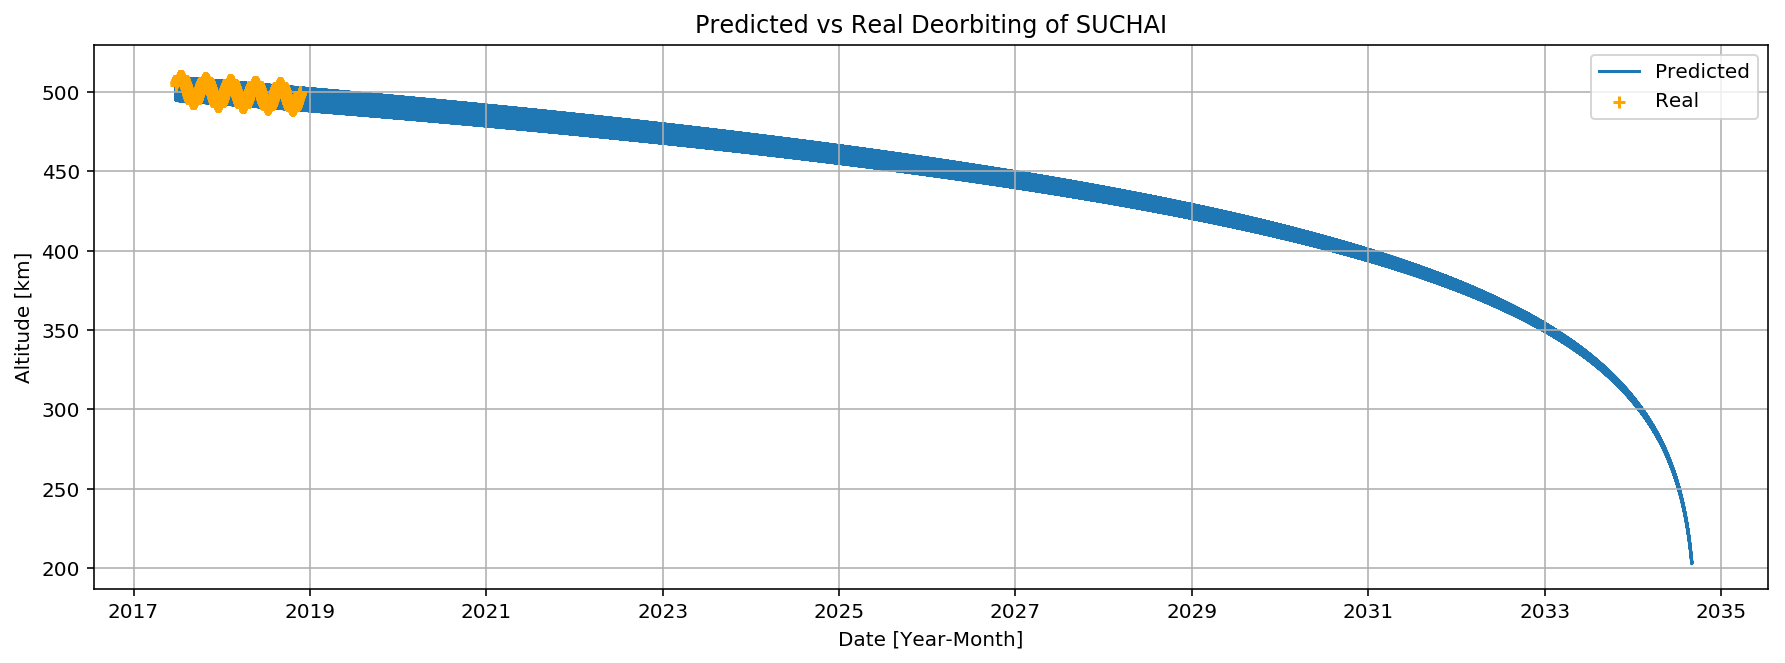

In [41]:
suchaiManeuvers.makeReport()
plt.figure(figsize=(15,5));
plt.title("Predicted vs Real Deorbiting of SUCHAI")
plt.xlabel("Date [Year-Month]")
plt.ylabel("Altitude [km]")
plt.plot(suchaiManeuvers.history.datetime,np.linalg.norm(suchaiManeuvers.history.r,axis=1)/1e3-constants.Re/1e3,zorder=1,label="Predicted")
plt.scatter(suchaiDates,suchaiAltitudes,marker="+",color="orange",zorder=2,label="Real");
plt.legend()
plt.grid()

In [184]:
loginRequest = requests.post("https://www.space-track.org/ajaxauth/login", 
                              data = {'identity':'ricardo.ramos@ing.uchile.cl',
                                      'password':'453123KO453123KO'})

<Response [200]>


In [185]:
r = requests.get("https://www.space-track.org/basicspacedata/query/class/tle/EPOCH/2013-01-01--2018-11-24/NORAD_CAT_ID/40969/orderby/TLE_LINE1 ASC/format/tle",
                  cookies=loginRequest.cookies)
print(r)
with open("Historic_TLEs/ARC-1.txt","w",newline='\n') as f:
    f.write(r.text)

<Response [200]>


In [198]:
sats2017 = ["SUCHAI",
        "BEESAT-4",
        "Nayif-1",
        "Swayam COEP",
        "STEP-1"]
sats2015 = ["ARC-1",
        "BisonSat",
        "Fox-1A",
        "PropCube 1"]
sats2013 = ["Black Knight 1",
        "CAPE-2",
        "ChargerSat-1",
        "COPPER",
        "DragonSat 1",
        "KYSAT II",
        "NPS-SCAT",
        "PhoneSat 2.4a",
        "SwampSat"]
satsData2013 = {}
satsData2015 = {}
satsData2017 = {}
for sat in sats2013:
    print(sat)
    satsData2013[sat] = {}
    satsData2013[sat]["datetime"], satsData2013[sat]["coe"], satsData2013[sat]["altitudes"], satsData2013[sat]["ballistic"] = getSatHistoricalData("Historic_TLEs/"+sat+".txt")
for sat in sats2015:
    print(sat)
    satsData2015[sat] = {}
    satsData2015[sat]["datetime"], satsData2015[sat]["coe"], satsData2015[sat]["altitudes"], satsData2015[sat]["ballistic"] = getSatHistoricalData("Historic_TLEs/"+sat+".txt")
for sat in sats2017:
    print(sat)
    satsData2017[sat] = {}
    satsData2017[sat]["datetime"], satsData2017[sat]["coe"], satsData2017[sat]["altitudes"], satsData2017[sat]["ballistic"] = getSatHistoricalData("Historic_TLEs/"+sat+".txt")

Black Knight 1
CAPE-2
ChargerSat-1
COPPER
DragonSat 1
KYSAT II
NPS-SCAT
PhoneSat 2.4a
SwampSat
ARC-1
BisonSat
Fox-1A
PropCube 1
SUCHAI
BEESAT-4
Nayif-1
Swayam COEP
STEP-1


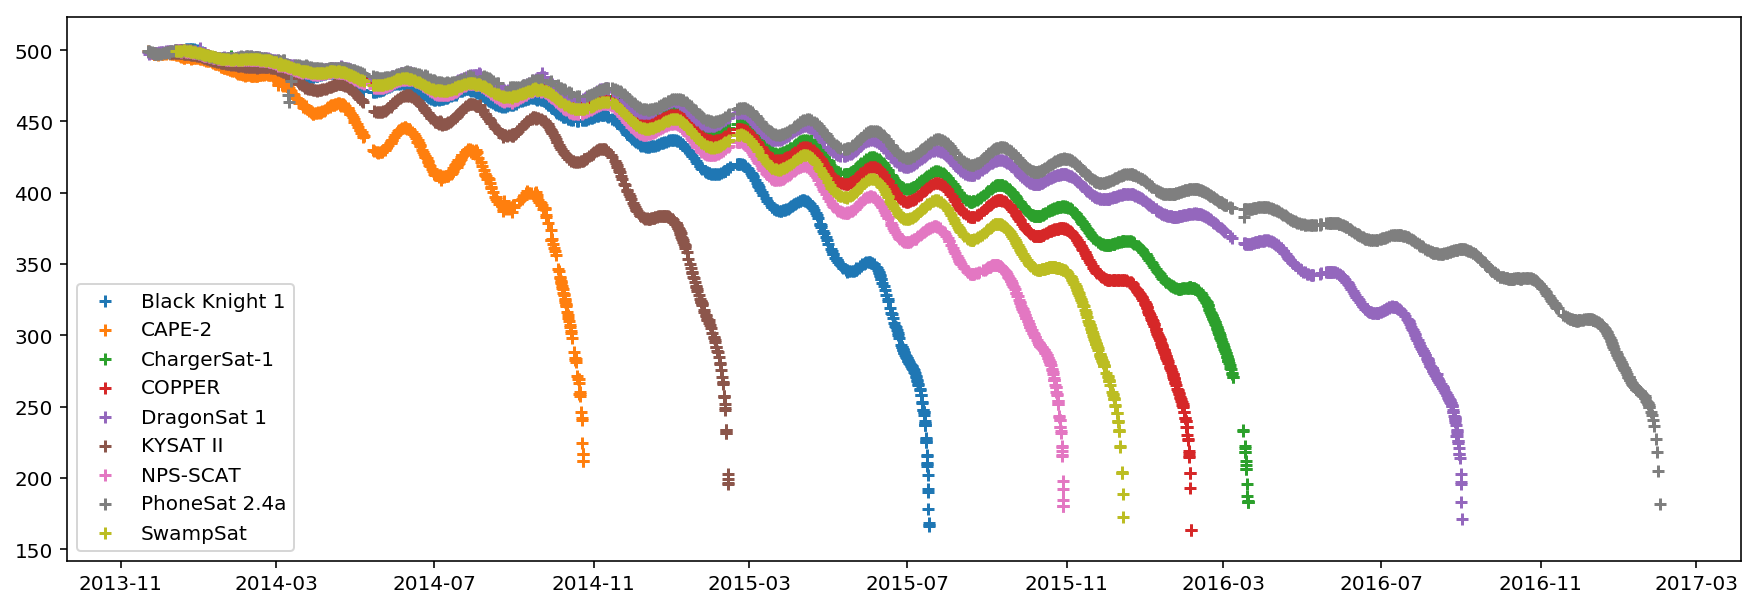

In [199]:
plt.figure(figsize=(15,5));
for sat in sats2013:    
    plt.scatter(satsData2013[sat]["datetime"],satsData2013[sat]["altitudes"],marker="+",label=sat)
#for sat in sats2015:    
#    plt.scatter(satsData2015[sat]["datetime"],satsData2015[sat]["altitudes"],marker="+",label=sat)
#for sat in sats2017:    
#    plt.scatter(satsData2017[sat]["datetime"],satsData2017[sat]["altitudes"],marker="+",label=sat)
plt.legend()

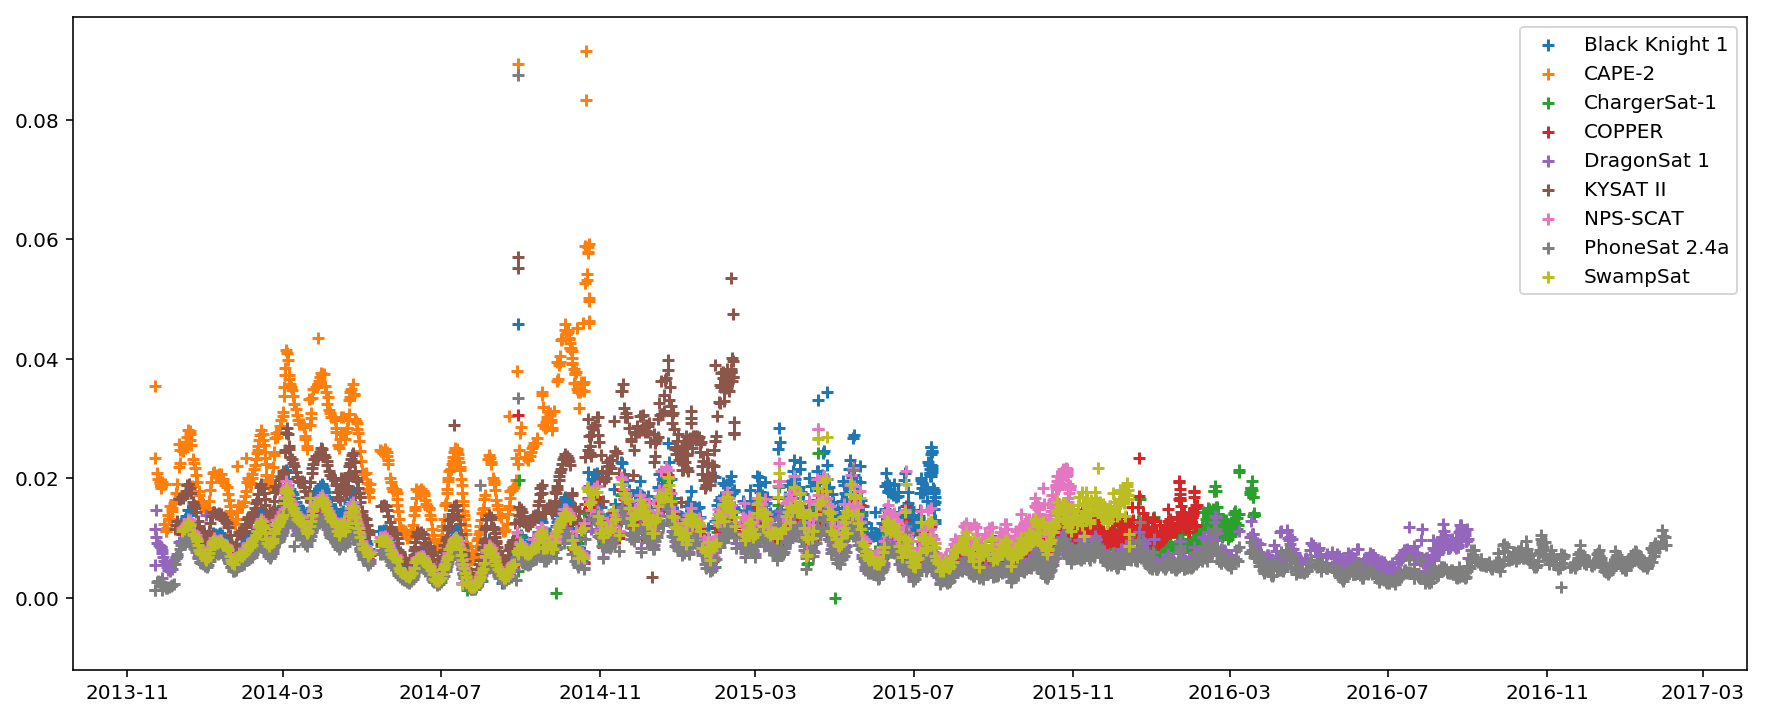

In [201]:
plt.figure(figsize=(15,6))
for sat in sats2013: 
    plt.scatter(satsData2013[sat]["datetime"],satsData2013[sat]["ballistic"],marker="+",label=sat)
    #plt.yscale('log')
plt.legend()